可视化数据的工具

In [31]:
# 常量定义
cell_color_define = [
    "darkred", # 雷
    "lightblue", # 周围1雷
    "aquamarine", # 2
    "peachpuff", # 3
    "lightseagreen", # 4
    "wheat", # 5
    "lightcyan", # 6
    "lightgrey", # 7
    "steelblue", # 8
    "black", # 错误数据
]

In [32]:
import matplotlib.pyplot as plt
import pandas as pd
import copy

def visualize(data_list: list, area_size: int):
    if not isinstance(data_list, pd.DataFrame):
        print("data_list is not DataFrame")
        raise TypeError
    if (len(data_list) == 0):
        print("data_list is empty")
        raise

    max_display_width = 12
    view_scale = 0.25
    title_extra_height = 0.4

    data_cnt = len(data_list)
    # 盘面基本数据
    table_r = data_list.iloc[0,0]
    table_c = data_list.iloc[0,1]
    result = data_list.iloc[0,-1]
    print(f"visualize, table_r: {table_r}, table_c: {table_c}, area_size: {area_size} result: {result}")

    #计算单个图表尺寸
    plot_view_width = table_c * view_scale
    plot_view_height = table_r * view_scale + title_extra_height

    # 计算图表行数
    plot_per_row = round(max_display_width / plot_view_width)
    plot_row = ((data_cnt - 1) // plot_per_row) + 1

    # 图表维度标识
    labelc = [f"{i:X}" for i in range(table_c)]
    labelr = [f"{i:X}" for i in range(table_r)]

    # fig, axs = plt.subplots(plots_row, plot_per_row, figsize=(plot_per_row * plot_view_width, plots_row * plot_view_height))
    fig, axs = plt.subplots(plot_row, plot_per_row, num=data_cnt, figsize=(plot_view_width * plot_per_row, plot_view_height * plot_row))

    for idx, ax in enumerate(axs.flat):
        ax.set_axis_off()
        if idx >= data_cnt:
            continue
        raw_data = data_list.iloc[idx].values
        board_data = raw_data[4:-1]
        # print("raw_data:")
        # print(raw_data)
        # print("board number")
        # print(raw_data[4:-1])
        block_loc_x = raw_data[2]
        block_loc_y = raw_data[3]
        chars = [["" for c in range(table_c)] for r in range(table_r)]
        cell_bg_color = copy.deepcopy(chars)

        for row_idx in range(table_r):
            for col_idx in range(table_c):
                block_idx = row_idx * table_c + col_idx
                if area_size > 0 and (row_idx < block_loc_y - area_size or row_idx > block_loc_y + area_size or col_idx < block_loc_x - area_size or col_idx > block_loc_x + area_size):
                    cell_bg_color[row_idx][col_idx] = "black"
                else:
                    x_idx = col_idx
                    y_idx = row_idx
                    i = y_idx * table_c + x_idx
                    if area_size > 0:
                        x_idx -= block_loc_x - area_size
                        y_idx -= block_loc_y - area_size
                        i = y_idx * (area_size * 2 + 1) + x_idx
                    # print(f"row_idx: {row_idx}, col_idx: {col_idx}, block_idx: {block_idx}, xIdx: {x_idx}, yIdx: {y_idx}, i: {i}")
                    block_value = board_data[i]
                    if not (block_value == -1 or block_value == 0):
                        chars[row_idx][col_idx] = block_value
                    if col_idx == block_loc_x and row_idx == block_loc_y:
                        if result == 0:
                            cell_bg_color[row_idx][col_idx] = cell_color_define[0]
                        elif result == 1:
                            cell_bg_color[row_idx][col_idx] = "darkorange"
                        else:
                            cell_bg_color[row_idx][col_idx] = "darkgreen"
                    elif block_value == -1:
                        cell_bg_color[row_idx][col_idx] = "grey"
                    elif block_value == 0:
                        cell_bg_color[row_idx][col_idx] = "white"
                    else:
                        cell_bg_color[row_idx][col_idx] = cell_color_define[block_value]

        ax.set_title(f'x {block_loc_x}, y {block_loc_y}')
        table = ax.table(
            cellText=chars,
            rowLabels=labelr,
            colLabels=labelc,
            # 行标
            rowColours=["lightgrey"] * table_r,
            # 列标
            colColours=["lightgrey"] * table_c,
            cellColours=cell_bg_color,
            cellLoc='center',
            loc='upper left',
        )
    plt.show()

total data cnt: 77, visualize from 0 to 9
visualize, table_r: 8, table_c: 8, area_size: 1 result: 2


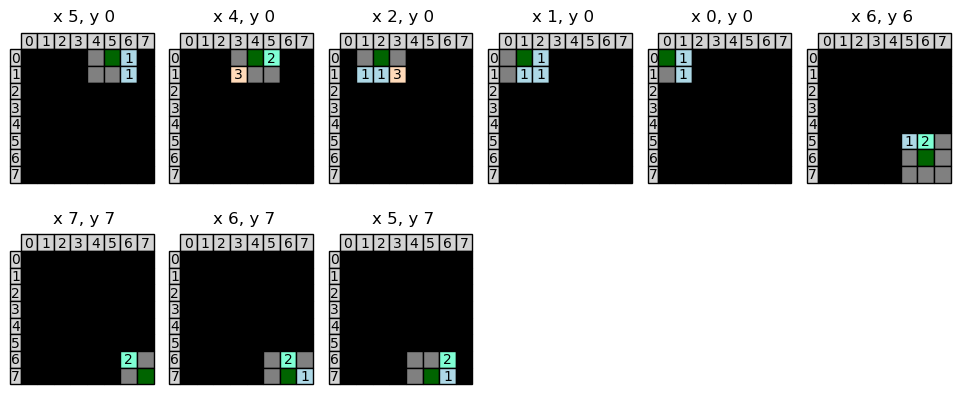

In [33]:
import os
import pandas as pd
# csv_file_dir = "C:/Dev/picoVideo/vrtv/SavedTrainingDataset/20230809_merged/0"
csv_file_dir = "/Users/chenweichu/SavedTrainingDataset/20230813/2"
csv_file_name =  "20230813_8_8_1_2.csv"

area_size = int(csv_file_name[13])

# 从第几行开始开始
display_data_start_line = 0
# 展示几行
display_data_line_cnt = 9

data = pd.read_csv(os.path.join(csv_file_dir, csv_file_name), header=None)
total_data_cnt = data.shape[0]

if display_data_start_line >= total_data_cnt:
    display_data_start_line = total_data_cnt - 1
    print(f"display_data_start_line is too large, reset to: {display_data_start_line}")

if display_data_start_line + display_data_line_cnt > total_data_cnt:
    display_data_line_cnt = total_data_cnt - display_data_start_line
    print(f"display_data_line_cnt is too large, reset to: {display_data_line_cnt}")

print(f"total data cnt: {data.shape[0]}, visualize from {display_data_start_line} to {display_data_start_line + display_data_line_cnt}")
visualize(data.iloc[display_data_start_line:display_data_start_line + display_data_line_cnt, :], area_size)
